# hand written digits recognition

accuracy 94%

The **MNIST** dataset is a well-known dataset in the field of machine learning, it's used for testing & training algorithms and models. It consists of 70,000 images of handwritten digits (0 to 9) that are 28 pixels wide and 28 pixels height. Each image is represented as a grayscale array of 784 pixels (28x28).

The MNIST dataset is frequently used for image classification tasks, where the goal is to train a machine learning model to correctly identify the digit represented in each image.

Digit recognition is used in a lot of activities like identify the digits on cheques or zip postal codes ... 

and in this notebook we will build a model that will identify the hand written digits based on the mnist data set.

# libraries 
<p> starting by importing the required libraries, we are going to use the following  :</p>
<b>numpy</b> : for manupilation vector and matrix  </br>
<b>pandas </b>: for importing and working with the dataset </br>
<b>matplotlib </b> : for visulazng the dataset </br>
<b> tensorflow </b> : for building the model

In [118]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/itsnotadataset/2.jpeg
/kaggle/input/mnist-dataset/train-images.idx3-ubyte
/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte
/kaggle/input/mnist-dataset/train-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte
/kaggle/input/mnist-dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte
/kaggle/input/mnist-dataset/train-images-idx3-ubyte/train-images-idx3-ubyte


## importing the data set

lets read our data frame using pandas 

In [119]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

## inspect the dataset

After readning the data set lets see the first 5 rows on it. <br>
We have the first column that contains the label for each digit and the rest contains the values(value of each pixel) of the image vector(784 pixel => (28,28))

In [120]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
#the shape of the data set 
#it contains 42000 image with shape of (28,28) 
df.shape
#train has a label

(42000, 785)

## split the dataset

Now after we read and seen the data set lets split it to a training set and testing set.<br>
we will take 10000 element in the trainig set and 1000 element in the testing set

In [122]:
test_slice = df_test[0:100]
# y_test = np.array(test_slice['label'])
# test_slice = test_slice.drop('label',axis=1)

In [123]:
# the training set
train_slice=df[0:10000]
y_train = np.array(train_slice['label']) # label
X_train = np.array(train_slice.drop('label',axis=1))


In [124]:
#the testing set
test_slice= df[10001:11001]
y_test = np.array(test_slice['label']) # label
x_test = test_slice.drop('label',axis=1)

In [125]:
# the shape of each shape
print(f"the shape of the testing set {test_slice.shape}")
print(f"the shape of the training set {train_slice.shape}")
print(f"the shape of x_train set and y_train set {y_train.shape,X_train.shape}")
print(f"the shape of x_test set and y_test set {y_test.shape,x_test.shape}")

the shape of the testing set (1000, 785)
the shape of the training set (10000, 785)
the shape of x_train set and y_train set ((10000,), (10000, 784))
the shape of x_test set and y_test set ((1000,), (1000, 784))


In [126]:
train_slice.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## visualizing the data

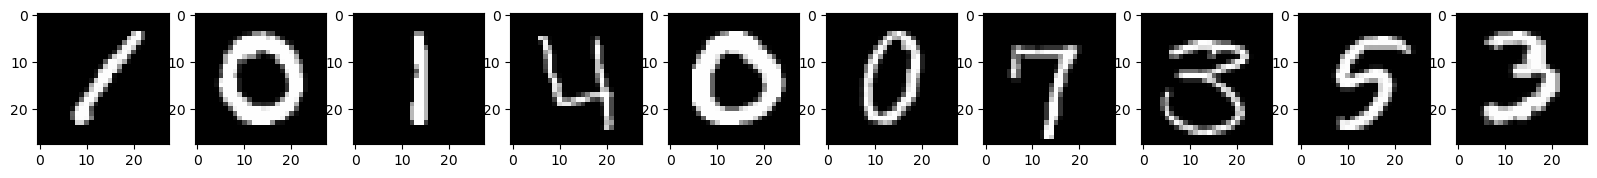

In [127]:
fig ,ax = plt.subplots(1,10,figsize=(20,3))
for i in range(10):
    testReshaped=X_train[i].reshape(28,28)
    ax[i].imshow(testReshaped.astype('uint8'),interpolation="none",cmap="gray")
plt.show()

## Model

### import required library for building the model

In [128]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

we will build a neural network of 3 layers, the first layer contains 35 units with relu activation, the second layer contains 30 units with relu activation and the last layer contains 10 units to predict each number with linear activation

In [272]:
model= Sequential([
    tf.keras.Input(shape=(784,)),  
    Dense(units=512,activation='relu'),
    #Dense(units=10,activation='relu'),
    Dense(units=10,activation='linear'),
])

for the cost/loss function we will use Sparse Categorical Cross entropy and the adam algorithm. <br>

In [273]:
# train and fit the model
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
     metrics=['accuracy'],
)

history=model.fit(X_train,y_train,epochs=20,validation_data=(x_test, y_test))

Epoch 1/20
313/313 [==============================] - 2s 7ms/step - loss: 9.9966 - accuracy: 0.8504 - val_loss: 3.2445 - val_accuracy: 0.8960
Epoch 2/20
313/313 [==============================] - 2s 6ms/step - loss: 1.8299 - accuracy: 0.9327 - val_loss: 2.2438 - val_accuracy: 0.9200
Epoch 3/20
313/313 [==============================] - 2s 6ms/step - loss: 1.1305 - accuracy: 0.9472 - val_loss: 1.5448 - val_accuracy: 0.9270
Epoch 4/20
313/313 [==============================] - 2s 6ms/step - loss: 0.5936 - accuracy: 0.9616 - val_loss: 1.9339 - val_accuracy: 0.9340
Epoch 5/20
313/313 [==============================] - 2s 6ms/step - loss: 0.5737 - accuracy: 0.9663 - val_loss: 1.7188 - val_accuracy: 0.9250
Epoch 6/20
313/313 [==============================] - 2s 6ms/step - loss: 0.5503 - accuracy: 0.9661 - val_loss: 1.7019 - val_accuracy: 0.9320
Epoch 7/20
313/313 [==============================] - 2s 6ms/step - loss: 0.5604 - accuracy: 0.9686 - val_loss: 1.9189 - val_accuracy: 0.9210
Epoch 

## predict the digit

after training the model lets use it to predict the digit in the images

Text(0.5, 1.0, 'the digit we will predict')

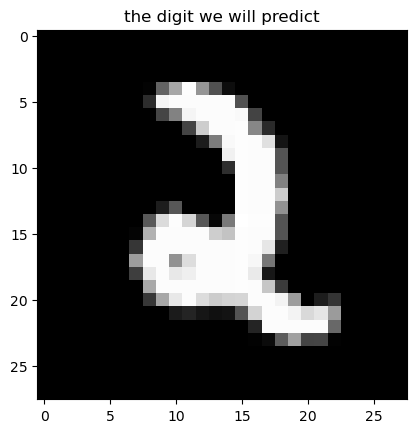

In [259]:
prr=np.array(test_slice.iloc[999][1:]) # there is 1000 element you can change between 0 999
testReshaped=prr.reshape(28,28)
plt.imshow(testReshaped.astype('uint8'),interpolation="none",cmap="gray")
plt.title('the digit we will predict')

In [274]:
result=model.predict(prr.reshape(1,784))

1/1 [==============================] - 0s 48ms/step


In [275]:
print(f"the digit on the image is {np.argmax(result)}")

the digit on the image is 2


## the accuracy of the model

In [219]:
loss,accuracy = model.evaluate(x_test, y_test, verbose=0)

In [220]:
print(f"the accuracy is {accuracy*100:.2f}%")

the accuracy is 88.60%


convulution matrix and accuracy

In [277]:
test = [np.array(test_slice.iloc[i][1:]) for i in range(1000)]
test=np.array(test)
y_label=[test_slice.iloc[i][0] for i in range(1000)]
y_pred=[np.argmax(model.predict(test[i].reshape(1,784))) for i in range(1000)]

1/1 [==============================] - 0s 40ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_pred,y_label)
sns.heatmap(cm,annot=True)

here on the horizantal axis we have the digit we wanted to predict and on the vertical axis we have the the predicted digit and how many its predicted

In [138]:
#model.metrics_names

i have imported a written digit i wrote it to predec it

In [139]:
from PIL import Image # fro manupilation the images

In [140]:
image=Image.open('/kaggle/input/itsnotadataset/2.jpeg')
# read the image

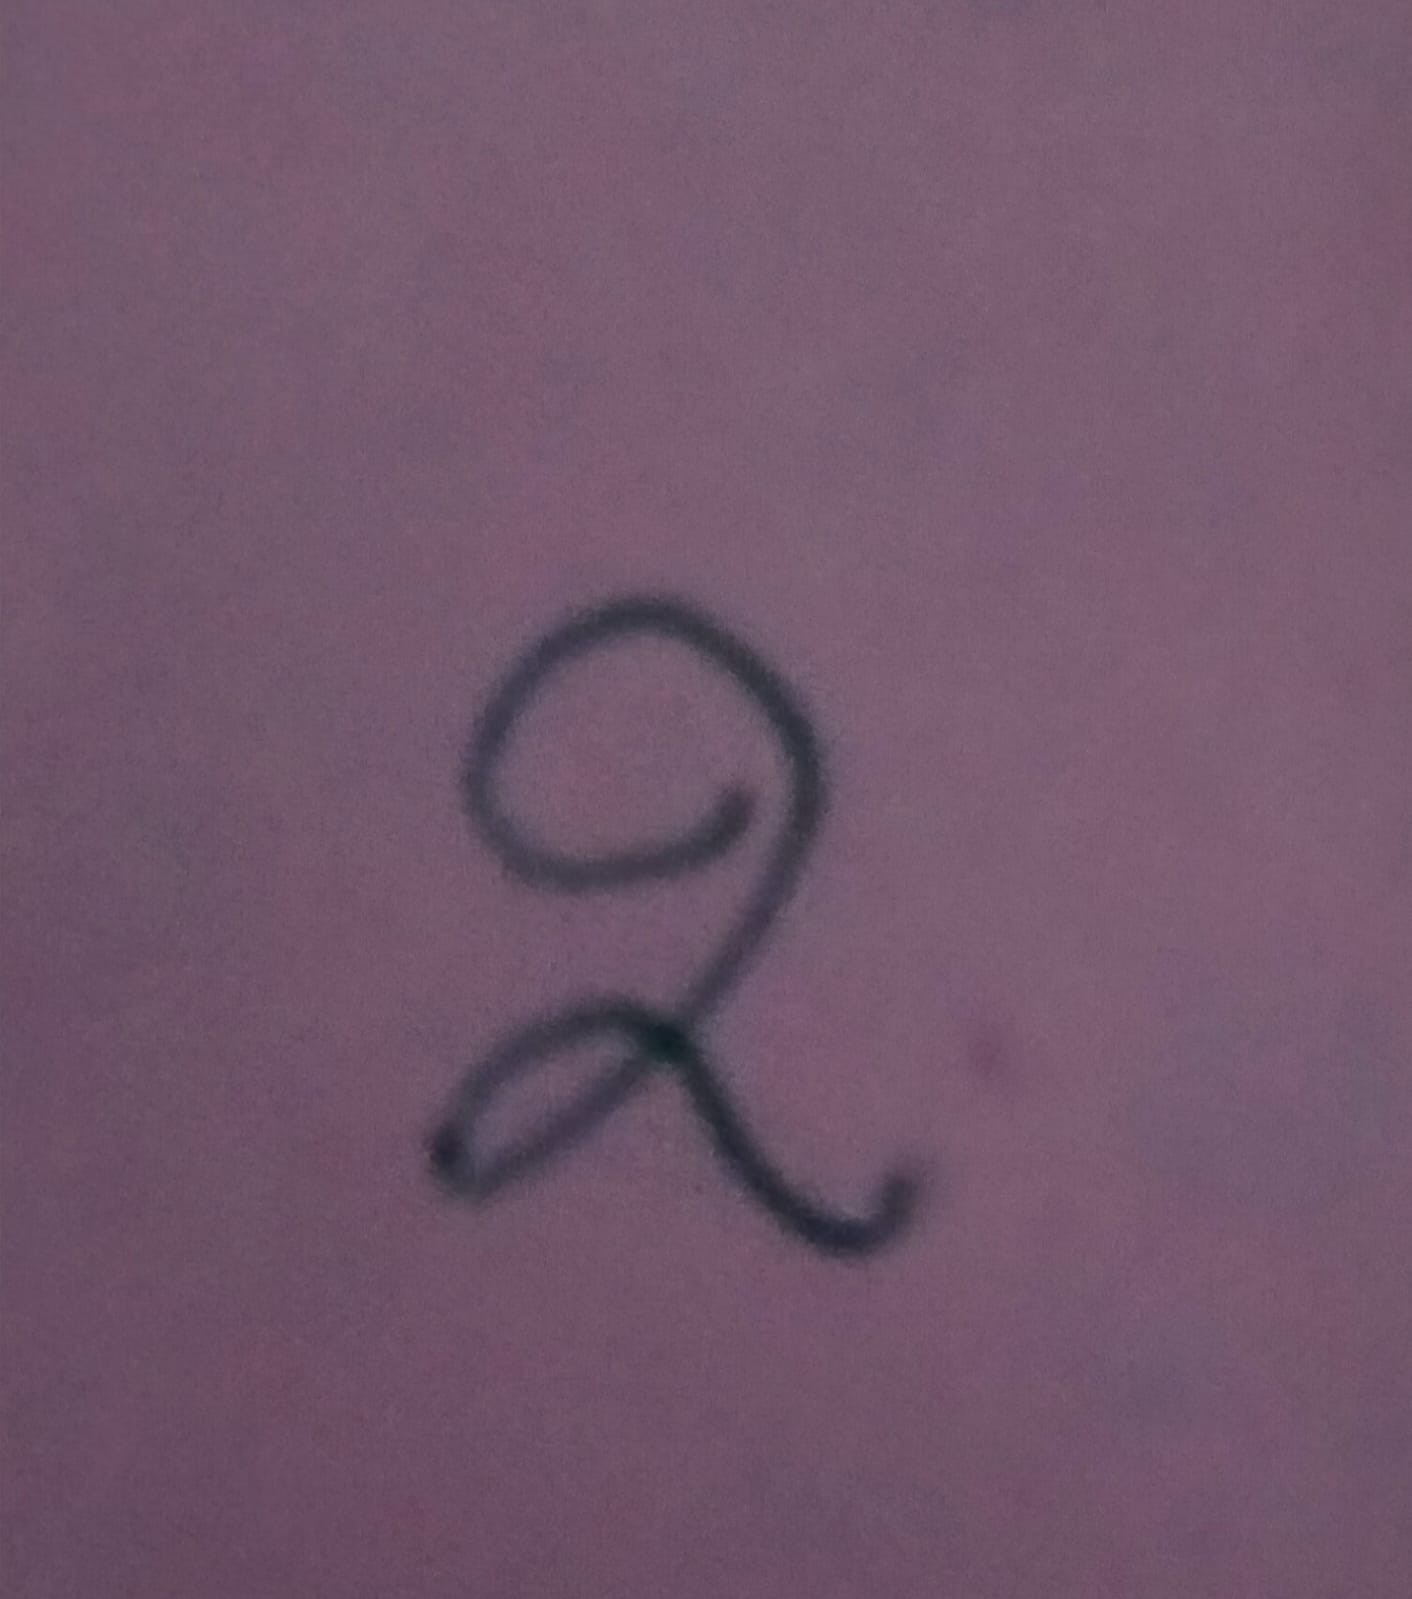

In [141]:
image # visualize the digit

In [142]:
#preprocecing
image=image.resize((28,28))
image=image.convert('L')
imArray=np.array(image)

In [276]:
# predict the digit
result=model.predict(imArray.reshape(1,784))
print(f"the number is : {np.argmax(result)}")

1/1 [==============================] - 0s 45ms/step
the number is : 2
